## 📌 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from IPython.display import Image, display
import warnings
import os

# Suppress edgecolor warnings
warnings.filterwarnings("ignore")

2025-07-04 16:31:30.854359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751646691.130437      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751646691.212498      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 🔥 Set true dark themes

In [2]:
plt.style.use('default')  # reset base
mpl.rcParams.update({
    'figure.facecolor': '#0f0f0f',
    'axes.facecolor': '#0f0f0f',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'axes.titlecolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#444444',
    'text.color': 'white',
    'lines.linewidth': 2,
    'axes.grid': True,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.facecolor': '#111111',
    'legend.edgecolor': 'white',
    'savefig.facecolor': '#0f0f0f'
})

# ✅ Seaborn theme (dark grid + vivid color palette)
sns.set_theme(style='darkgrid', palette='bright', rc={
    'axes.facecolor': '#0f0f0f',
    'figure.facecolor': '#0f0f0f',
    'axes.edgecolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#444444',
    'text.color': 'white'
})

# ✅ Plotly full dark template
pio.templates.default = "plotly_dark"


## 📌 Load Dataset and Initial Info

In [3]:
file_path = '/kaggle/input/jena-climate-time-series-2009-2017-dataset/jena_climate_2009_2017.csv'
df = pd.read_csv(file_path)
df

,Date Time,p (mbar),rh (%),wv (m/s),max. wv (m/s),wd (deg),T (degC)
0,01.01.2009 00:10:00,996.52,93.30,1.03,1.75,152.3,-8.02
1,01.01.2009 00:20:00,996.57,93.40,0.72,1.50,136.1,-8.41
2,01.01.2009 00:30:00,996.53,93.90,0.19,0.63,171.6,-8.51
3,01.01.2009 00:40:00,996.51,94.20,0.34,0.50,198.0,-8.31
4,01.01.2009 00:50:00,996.51,94.10,0.32,0.63,214.3,-8.27
...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,73.10,0.67,1.52,240.0,-4.05
420547,31.12.2016 23:30:00,999.93,69.71,1.14,1.92,234.3,-3.35
420548,31.12.2016 23:40:00,999.82,67.91,1.08,2.00,215.2,-3.16
420549,31.12.2016 23:50:00,999.81,71.80,1.49,2.16,225.8,-4.23


In [4]:
print("\n✅ Dataset Loaded Successfully!")
print("\n🔹 Shape:", df.shape)
print("\n🔹 Columns:", df.columns.tolist())
print("\n🔍 Data Types:")
print(df.dtypes)
print("\n🔍 Null Values:")
print(df.isnull().sum())
print("\n📊 Summary Statistics:")
print(df.describe())


✅ Dataset Loaded Successfully!

🔹 Shape: (420551, 7)

🔹 Columns: ['Date Time', 'p (mbar)', 'rh (%)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'T (degC)']

🔍 Data Types:
Date Time         object
p (mbar)         float64
rh (%)           float64
wv (m/s)         float64
max. wv (m/s)    float64
wd (deg)         float64
T (degC)         float64
dtype: object

🔍 Null Values:
Date Time        0
p (mbar)         0
rh (%)           0
wv (m/s)         0
max. wv (m/s)    0
wd (deg)         0
T (degC)         0
dtype: int64

📊 Summary Statistics:
            p (mbar)         rh (%)       wv (m/s)  max. wv (m/s)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean      989.212776      76.008259       1.702224       3.056555   
std         8.358481      16.476175      65.446714      69.016932   
min       913.600000      12.950000   -9999.000000   -9999.000000   
25%       984.200000      65.210000       0.990000       1.760000   
50%       989.580000      79.300000       

## 📌 Parse Date Column and Sort

In [5]:
# Ensure 'Date Time' is datetime format
df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True)
df = df.sort_values('Date Time').reset_index(drop=True)
df

,Date Time,p (mbar),rh (%),wv (m/s),max. wv (m/s),wd (deg),T (degC)
0,2009-01-01 00:10:00,996.52,93.30,1.03,1.75,152.3,-8.02
1,2009-01-01 00:20:00,996.57,93.40,0.72,1.50,136.1,-8.41
2,2009-01-01 00:30:00,996.53,93.90,0.19,0.63,171.6,-8.51
3,2009-01-01 00:40:00,996.51,94.20,0.34,0.50,198.0,-8.31
4,2009-01-01 00:50:00,996.51,94.10,0.32,0.63,214.3,-8.27
...,...,...,...,...,...,...,...
420546,2016-12-31 23:20:00,1000.07,73.10,0.67,1.52,240.0,-4.05
420547,2016-12-31 23:30:00,999.93,69.71,1.14,1.92,234.3,-3.35
420548,2016-12-31 23:40:00,999.82,67.91,1.08,2.00,215.2,-3.16
420549,2016-12-31 23:50:00,999.81,71.80,1.49,2.16,225.8,-4.23


## 📌 Visualize All Features Over Time

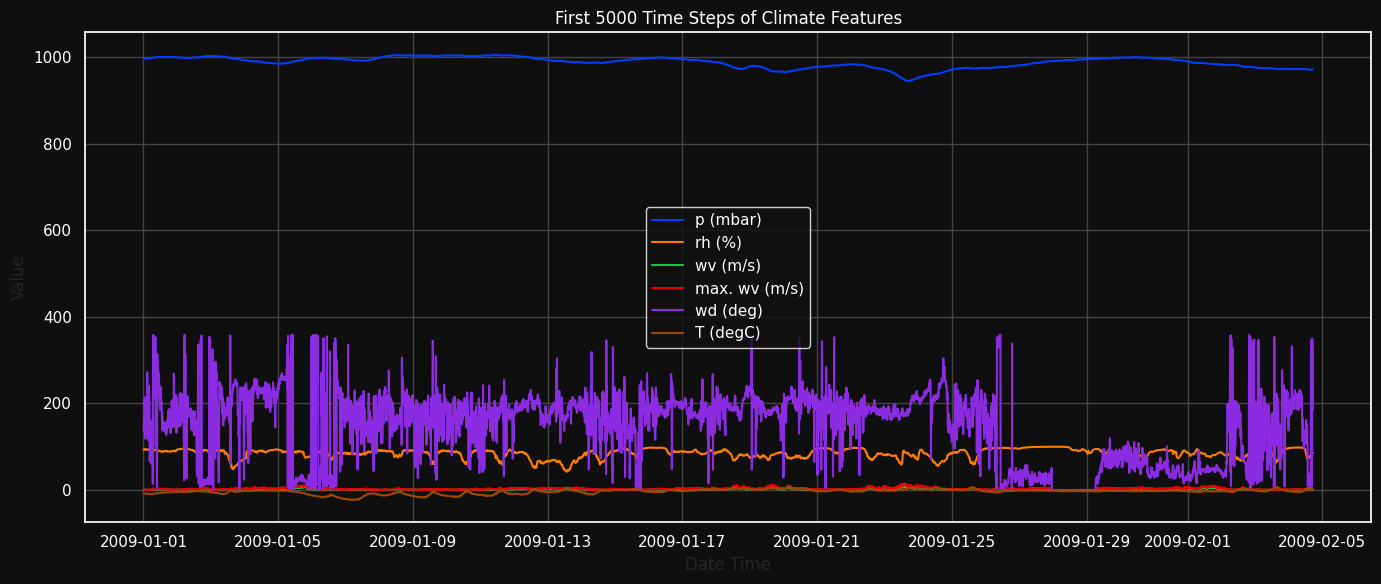

In [7]:
plt.figure(figsize=(14, 6))
for col in df.columns[1:]:  # skip 'Date Time'
    plt.plot(df['Date Time'][:5000], df[col][:5000], label=col)
plt.title('First 5000 Time Steps of Climate Features')
plt.xlabel('Date Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

## 📌 Seaborn Pairplot (Relationships)

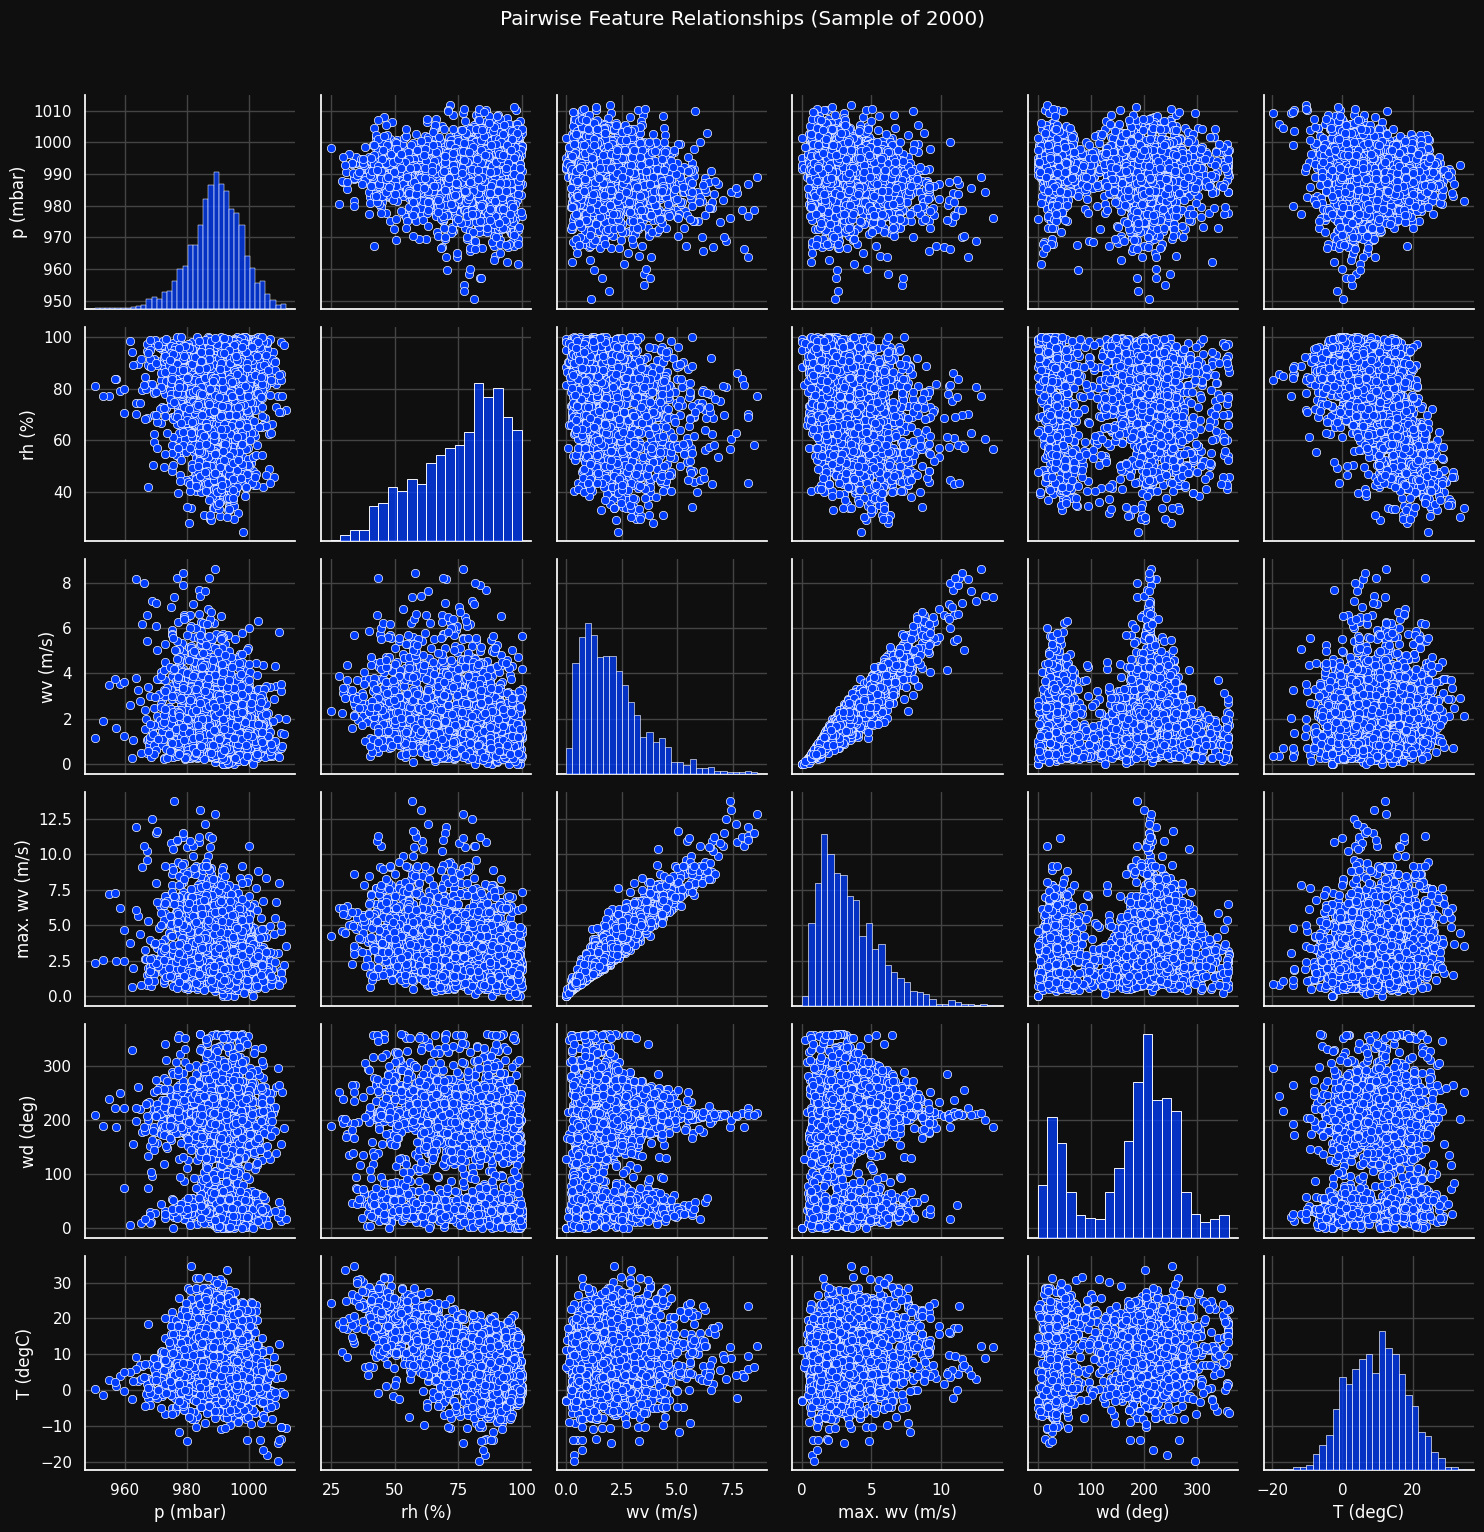

In [8]:
# Create pairplot
pair_grid = sns.pairplot(df.drop('Date Time', axis=1).sample(2000))

# Change all axis label colors and tick label colors to white
for ax in pair_grid.axes.flatten():
    if ax:  # Check if axis exists (not upper triangle blank cells)
        ax.set_facecolor('#0f0f0f')  # Optional: set axis background to match dark theme
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')

# Set the main title in white
plt.suptitle('Pairwise Feature Relationships (Sample of 2000)', y=1.02, color='white')

plt.tight_layout()
plt.show()

## 📌 Correlation Heatmap

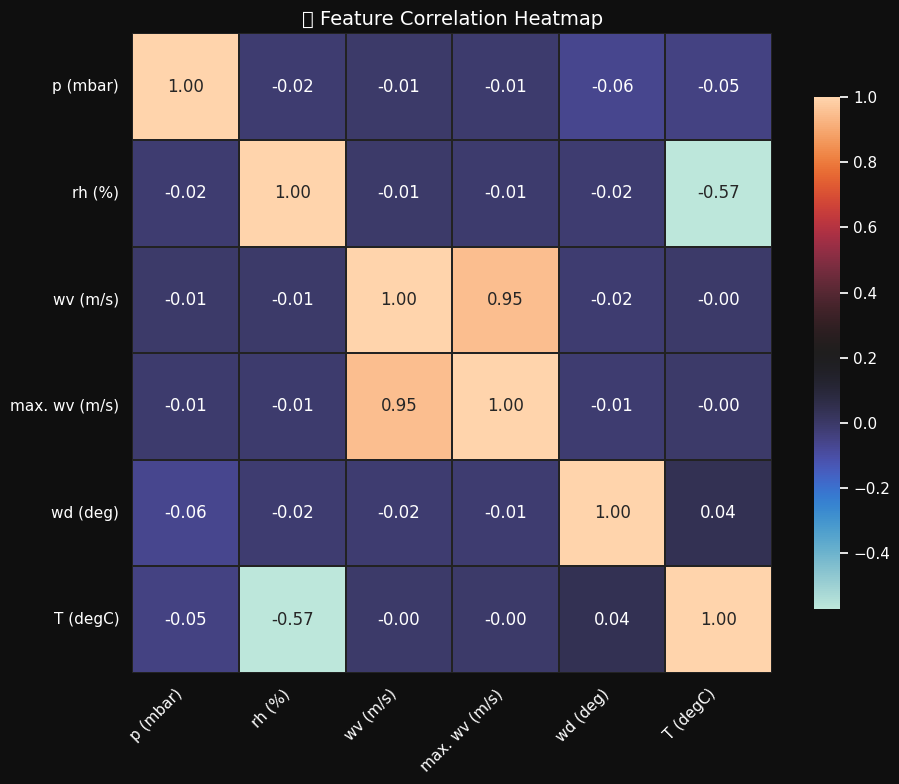

In [8]:
plt.figure(figsize=(10, 8))

# Correlation matrix
corr = df.drop('Date Time', axis=1).corr()

# Draw heatmap with improved colormap and dark style
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='icefire',           # 🔥 clean contrast, dark-friendly
    square=True,
    linewidths=0.3,
    linecolor='#222222',      # softer grid lines on dark
    cbar_kws={'shrink': 0.8}
)

# Set label and title colors
plt.title('🔗 Feature Correlation Heatmap', color='white', fontsize=14)
plt.xticks(color='white', rotation=45, ha='right')
plt.yticks(color='white', rotation=0)
plt.tight_layout()
plt.show()


## 📌  2D Scatter Plots with Matplotlib and Plotly

#### Matplotlib static

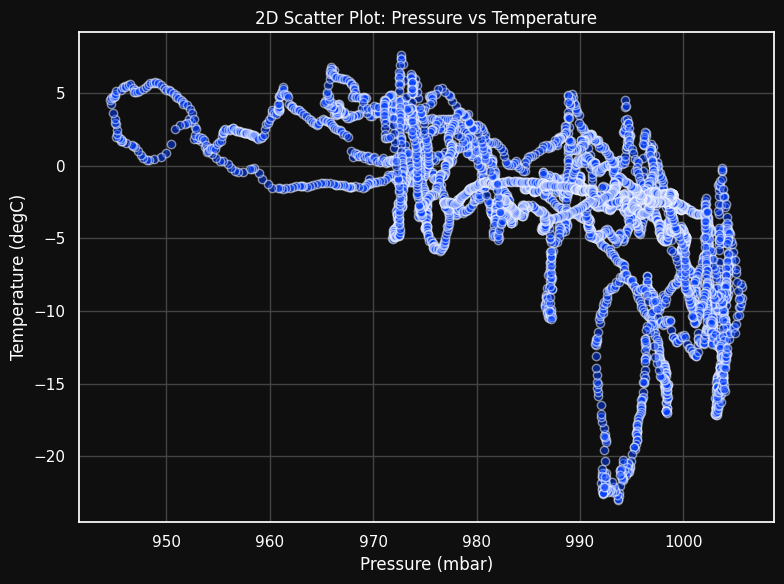

In [9]:
plt.figure(figsize=(8, 6))

# Scatter plot with edge and alpha
plt.scatter(df['p (mbar)'][:5000], df['T (degC)'][:5000], edgecolors='white', alpha=0.5)

# Set all text to white
plt.xlabel('Pressure (mbar)', color='white')
plt.ylabel('Temperature (degC)', color='white')
plt.title('2D Scatter Plot: Pressure vs Temperature', color='white')

# Update tick colors
plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(True, color='#444444')  # Optional: darker grid for contrast
plt.tight_layout()
plt.show()

### Plotly interactive

In [10]:
fig = px.scatter(df.sample(3000), x='p (mbar)', y='T (degC)', color='rh (%)',
                 title='Pressure vs Temperature (colored by Humidity)')
fig.show()

## 3D Scatter Plot

### Static 3D

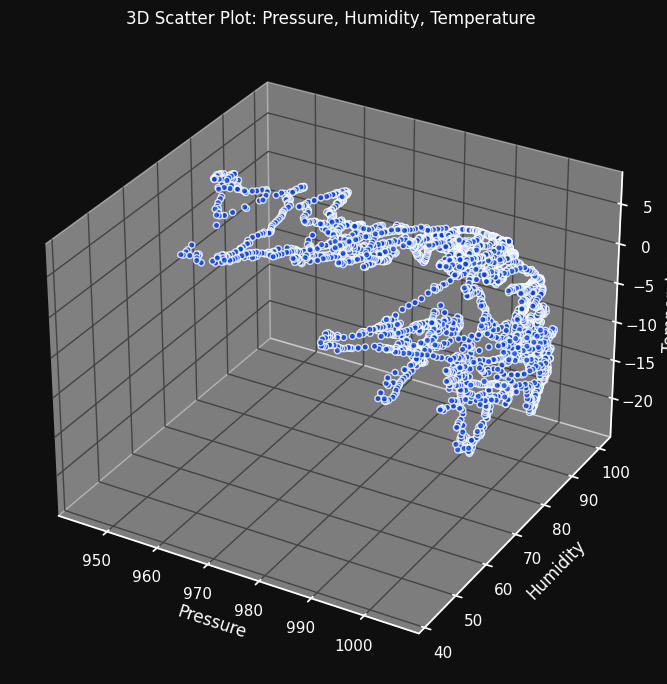

In [11]:
# Create figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color for visibility
ax.scatter(
    df['p (mbar)'][:4000],
    df['rh (%)'][:4000],
    df['T (degC)'][:4000],
    alpha=0.8, edgecolor='white'
)

# Set axis labels and title in white
ax.set_xlabel('Pressure', color='white')
ax.set_ylabel('Humidity', color='white')
ax.set_zlabel('Temperature', color='white')
ax.set_title('3D Scatter Plot: Pressure, Humidity, Temperature', color='white')

# Set tick label colors
ax.tick_params(colors='white')

# Set dark background manually
fig.patch.set_facecolor('#0f0f0f')
ax.set_facecolor('#0f0f0f')

plt.tight_layout()
plt.show()

### Plotly 3D interactive

In [12]:
fig = px.scatter_3d(df.sample(2000), x='p (mbar)', y='rh (%)', z='T (degC)',
                    color='wv (m/s)', title='3D Climate Visualization')
fig.show()

## 📌 Feature Scaling and Sequence Preparation

In [13]:
target = df['T (degC)']
features = df.drop(columns=['Date Time', 'T (degC)'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Combine scaled features and target as last column
scaled_data = np.hstack([scaled_features, scaled_target])

In [14]:
# Function to create sequences using all features as input,
# and using the first column (typically temperature) as the target
def create_sequences(data, lookback=72):
    X, y = [], []

    # Loop over the data, creating sequences of length = lookback
    for i in range(len(data) - lookback):
        # X: past 'lookback' steps of all features (full rows)
        X.append(data[i:i+lookback])

        # y: the target value is the first column at the time point after the sequence
        y.append(data[i+lookback][-1])  # -1 = last column (e.g., temperature)

    # Convert lists to NumPy arrays
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

In [15]:
# Split data
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("\n✅ Sequences Created")
print("X_train shape:", X_train.shape,"and y_train shape:", y_train.shape )
print("X_test shape:", X_test.shape, "and y_test shape:", y_test.shape)


✅ Sequences Created
X_train shape: (336383, 72, 6) and y_train shape: (336383,)
X_test shape: (84096, 72, 6) and y_test shape: (84096,)


##  📌 Build RNN, GRU, and LSTM Models

In [16]:
def build_model(model_type, input_shape):
    model = Sequential()

    # 🔁 First recurrent layer
    if model_type == 'RNN':
        model.add(SimpleRNN(64, return_sequences=True, input_shape=input_shape, activation='tanh'))
        model.add(SimpleRNN(32, return_sequences=False, activation='tanh'))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=True, input_shape=input_shape, activation='tanh'))
        model.add(GRU(32, return_sequences=False, activation='tanh'))
    elif model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True, input_shape=input_shape, activation='tanh'))
        model.add(LSTM(32, return_sequences=False, activation='tanh'))

    # 🧠 Regularization & Output
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # ⚙️ Compile with MSE + additional metrics
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='mse',
        metrics=['mae']
    )

    return model

## 📌  Train and Evaluate All Models


🔧 Training RNN model
Epoch 1/2
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 0.1126 - mae: 0.2333 - val_loss: 0.0041 - val_mae: 0.0471
Epoch 2/2
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.0207 - mae: 0.1089 - val_loss: 0.0059 - val_mae: 0.0636
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step

📊 Evaluation Metrics for RNN:
R2 Score : 0.9936
MSE      : 0.0059
MAE      : 0.0636
Model Summary for RNN:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 72, 64)         │         4,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,837 (97.02 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 16,516 (64.52 KB)

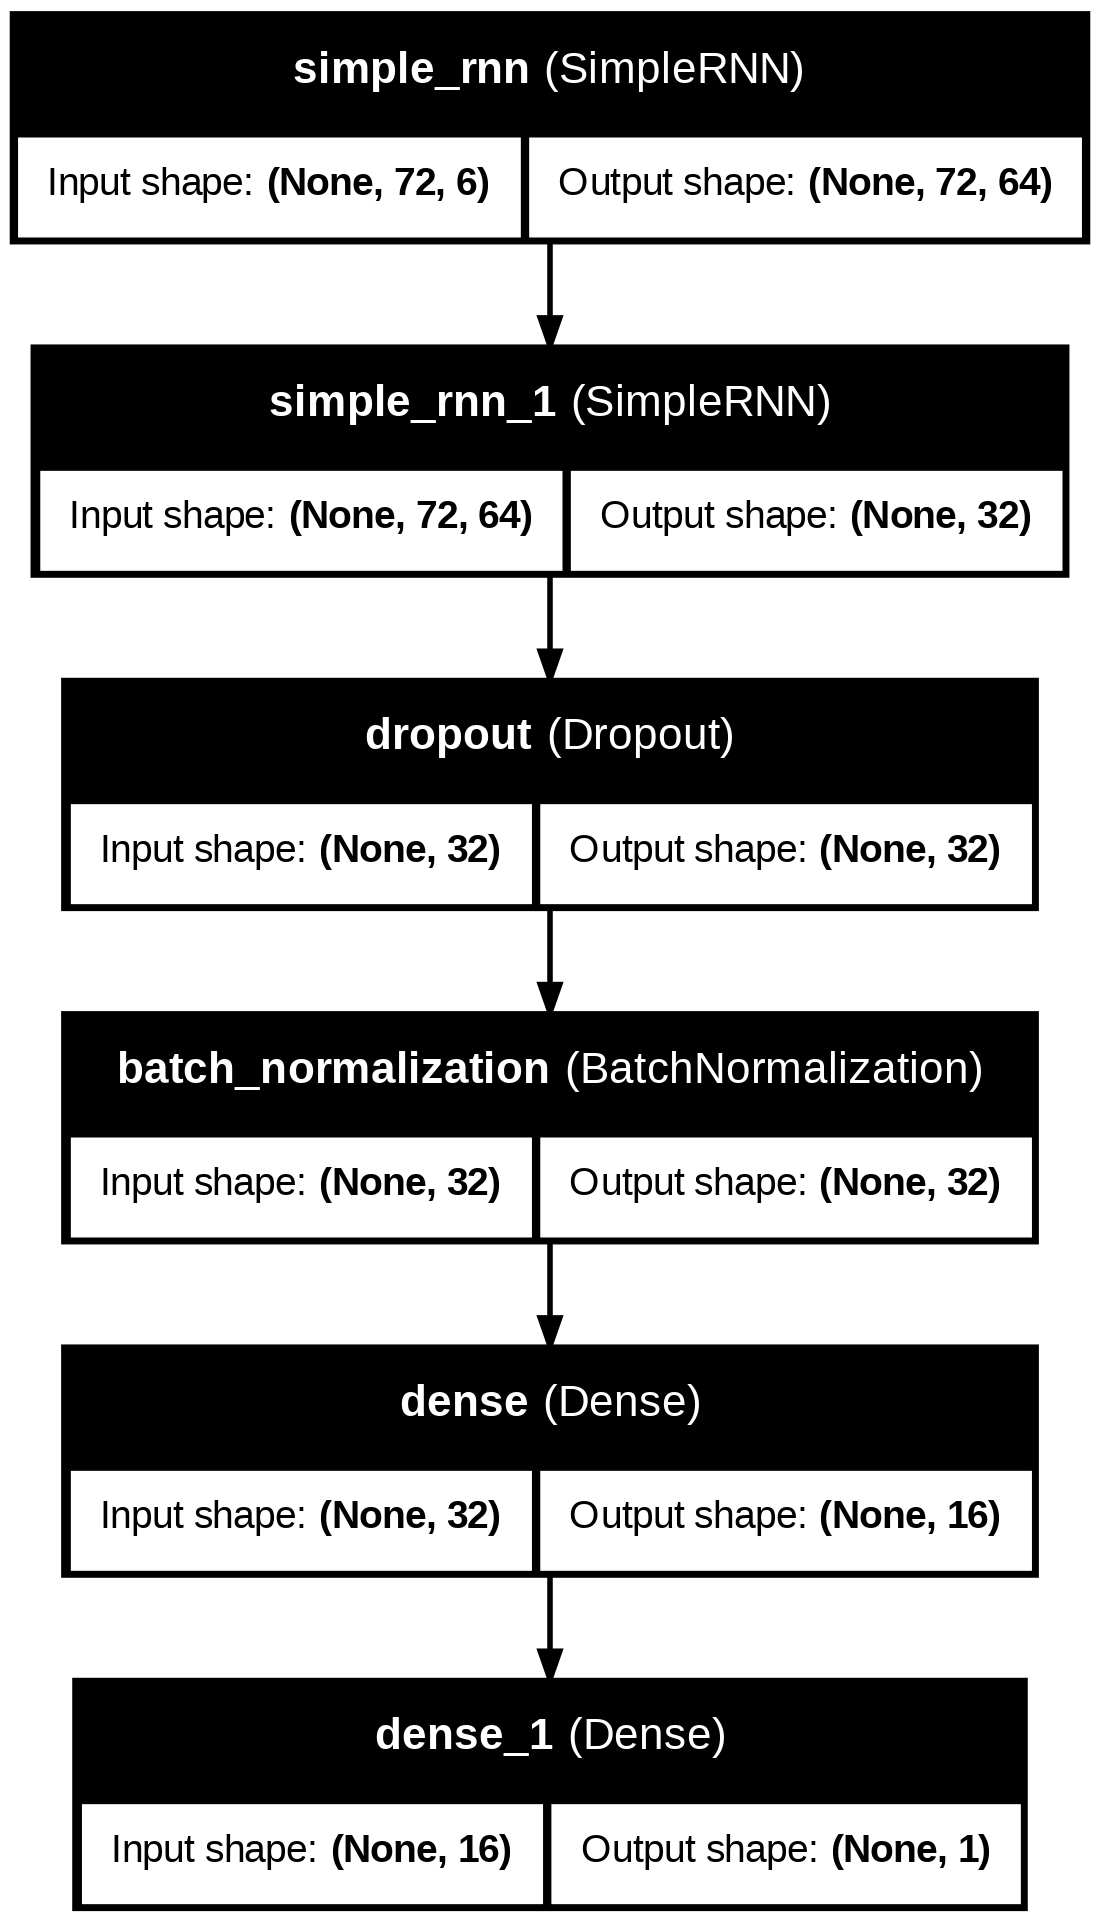

---------------------------------------------------
---------------------------------------------------

🔧 Training GRU model
Epoch 1/2
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - loss: 0.1135 - mae: 0.2204 - val_loss: 0.0037 - val_mae: 0.0468
Epoch 2/2
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 0.0203 - mae: 0.1079 - val_loss: 0.0044 - val_mae: 0.0483
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step

📊 Evaluation Metrics for GRU:
R2 Score : 0.9952
MSE      : 0.0044
MAE      : 0.0483
Model Summary for GRU:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 72, 64)         │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,589 (279.65 KB)

 Trainable params: 23,841 (93.13 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 47,684 (186.27 KB)

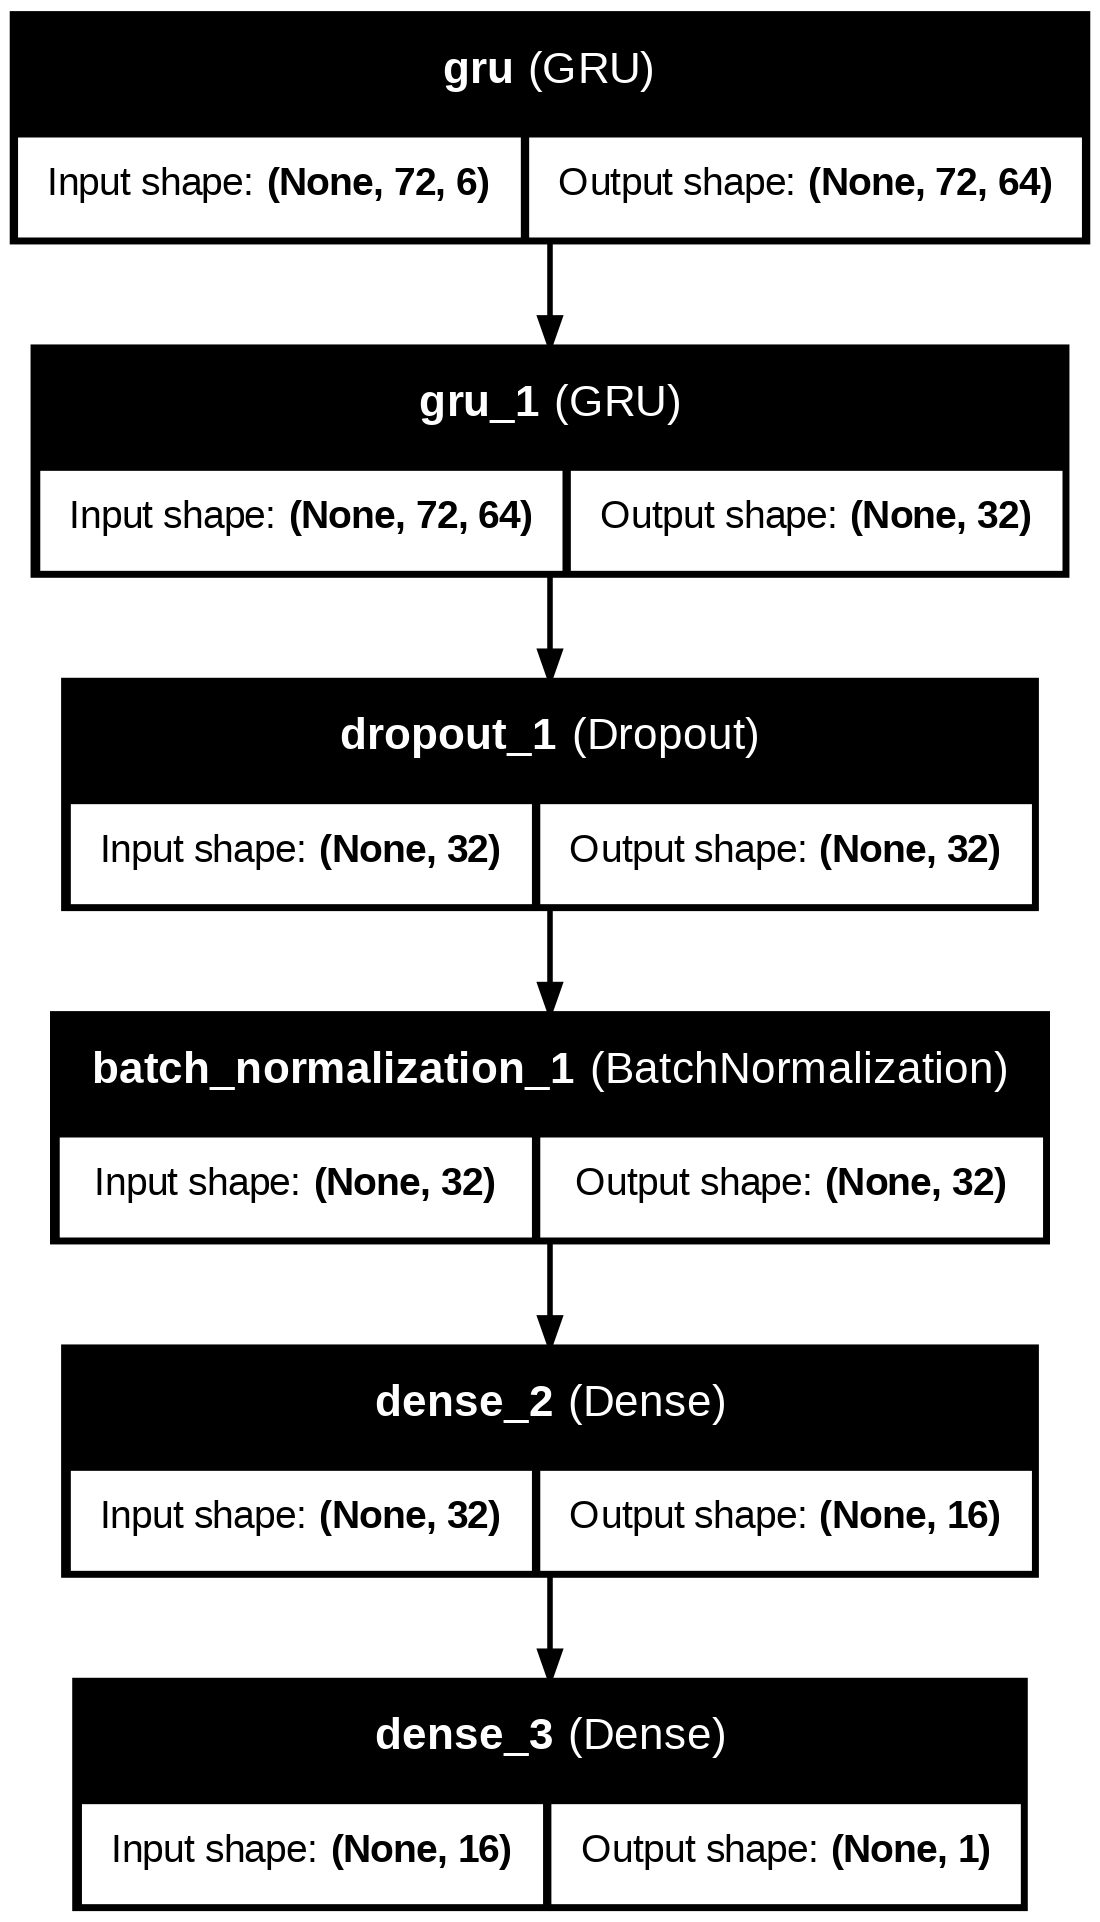

---------------------------------------------------
---------------------------------------------------

🔧 Training LSTM model
Epoch 1/2
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - loss: 0.1253 - mae: 0.2330 - val_loss: 0.0062 - val_mae: 0.0573
Epoch 2/2
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.0195 - mae: 0.1059 - val_loss: 0.0066 - val_mae: 0.0627
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step

📊 Evaluation Metrics for LSTM:
R2 Score : 0.9928
MSE      : 0.0066
MAE      : 0.0627
Model Summary for LSTM:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 72, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,669 (365.90 KB)

 Trainable params: 31,201 (121.88 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 62,404 (243.77 KB)

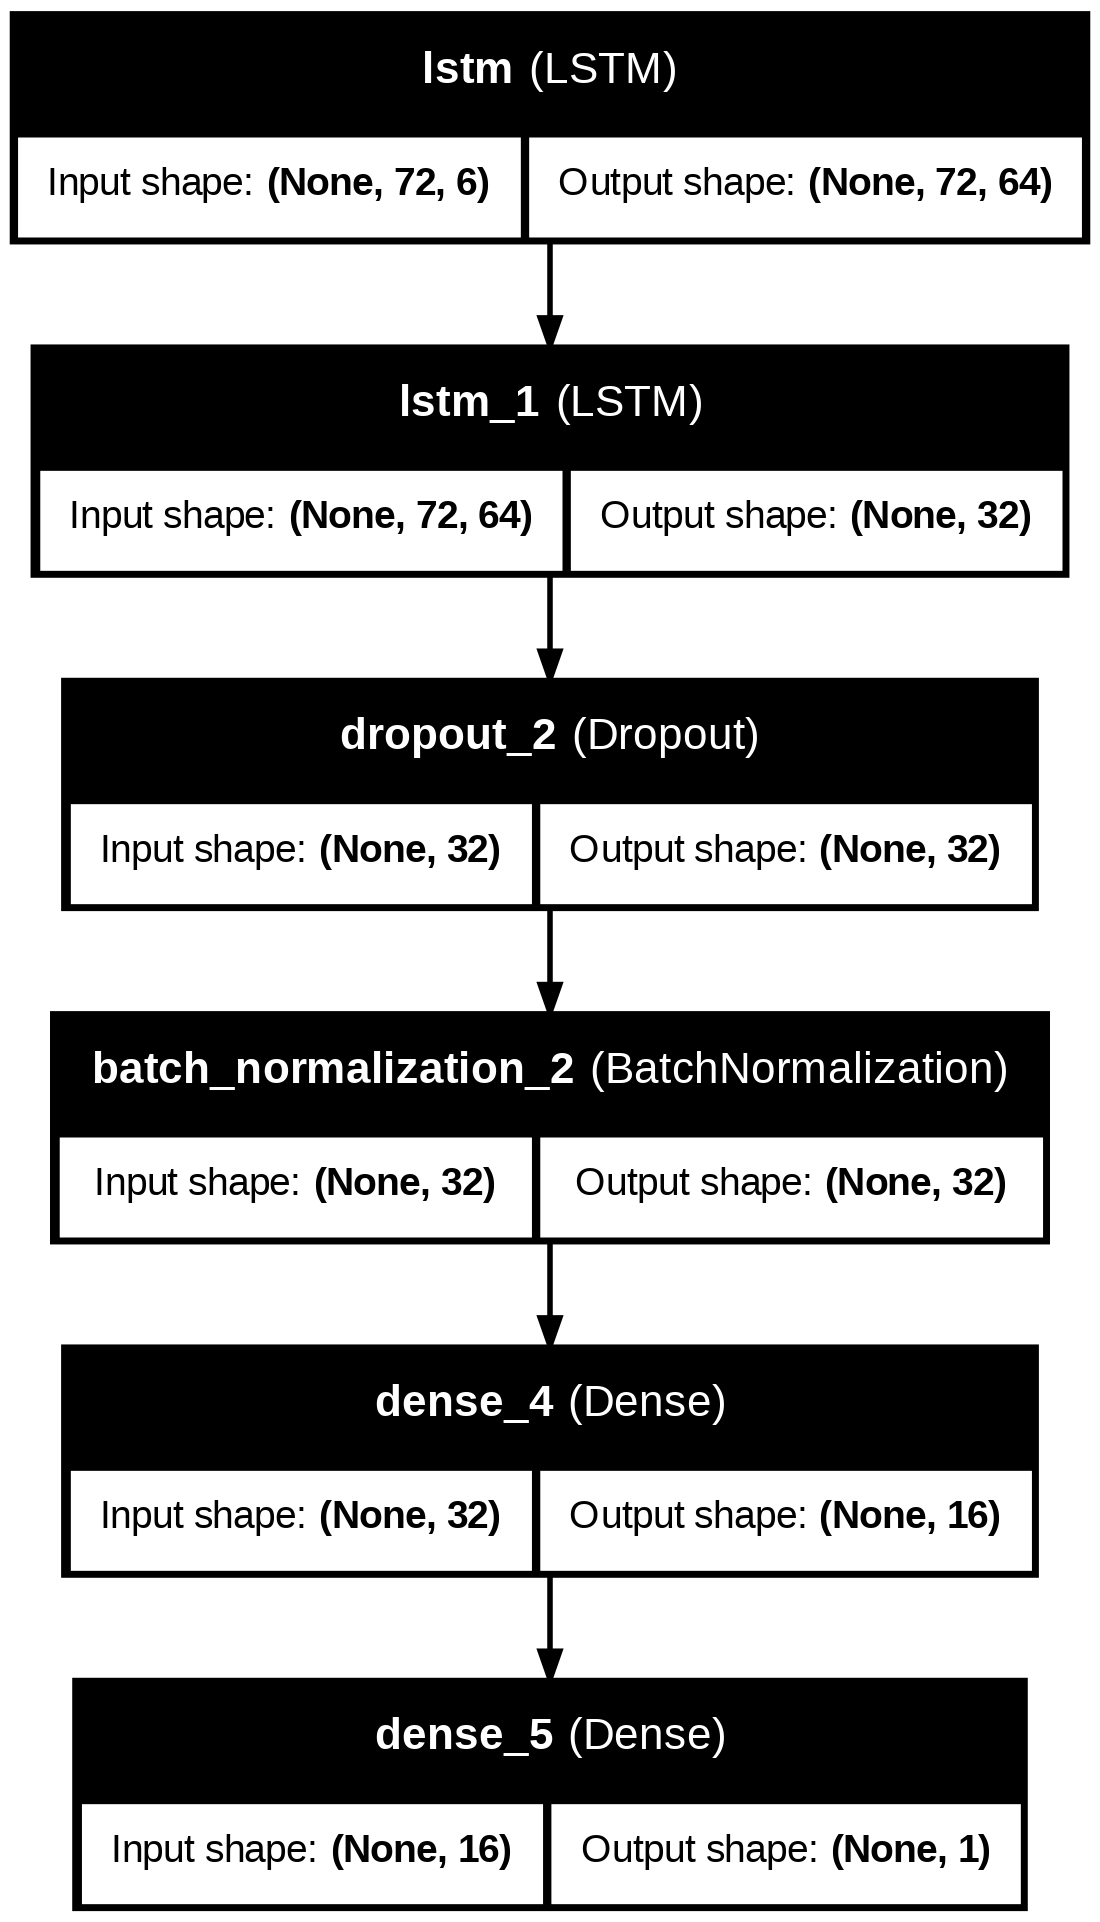

---------------------------------------------------
---------------------------------------------------


In [17]:
models = ['RNN','GRU', 'LSTM']
results = {}

for name in models:
    print(f"\n🔧 Training {name} model")
    model = build_model(name, X_train.shape[1:])
    history = model.fit(X_train, y_train, epochs=2, batch_size=128, validation_data=(X_test,y_test), verbose=1)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    results[name] = {
        'r2': r2,
        'mse': mse,
        'mae': mae,
        'history': history.history,
        'y_pred': y_pred
    }

    # Print evaluation results
    print(f"\n📊 Evaluation Metrics for {name}:")
    print(f"R2 Score : {r2:.4f}")
    print(f"MSE      : {mse:.4f}")
    print(f"MAE      : {mae:.4f}")

    print(f"Model Summary for {name}:")
    model.summary()

    # Save model architecture diagram
    os.makedirs("models", exist_ok=True)
    model_plot_path = f"models/{name}_model.png"
    plot_model(model, to_file=model_plot_path, show_shapes=True, show_layer_names=True)

    # Display model plot inline
    display(Image(filename=model_plot_path))
    print('---------------------------------------------------')
    print('---------------------------------------------------')

## 📌 Compare Results in Bar Chart

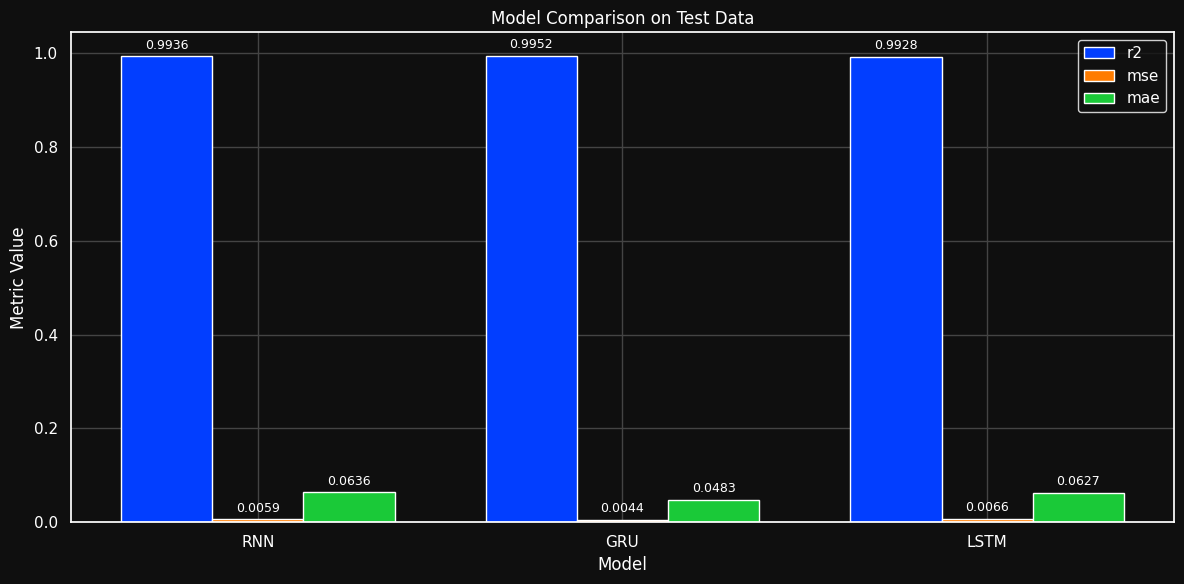

In [18]:
metrics = ['r2', 'mse', 'mae']
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    values = [results[m][metric] for m in models]
    bars = plt.bar(index + i * bar_width, values, width=bar_width, label=metric)

    # Add value labels above each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.4f}",
            ha='center',
            va='bottom',
            color='white',
            fontsize=9
        )

# Axis labels and ticks in white
plt.xlabel('Model', color='white')
plt.ylabel('Metric Value', color='white')
plt.title('Model Comparison on Test Data', color='white')
plt.xticks(index + bar_width, models, color='white')
plt.yticks(color='white')
plt.legend()
plt.grid(True, color='#444444')
plt.tight_layout()
plt.show()

## 📌 Plot Predictions vs Actual for Each Model

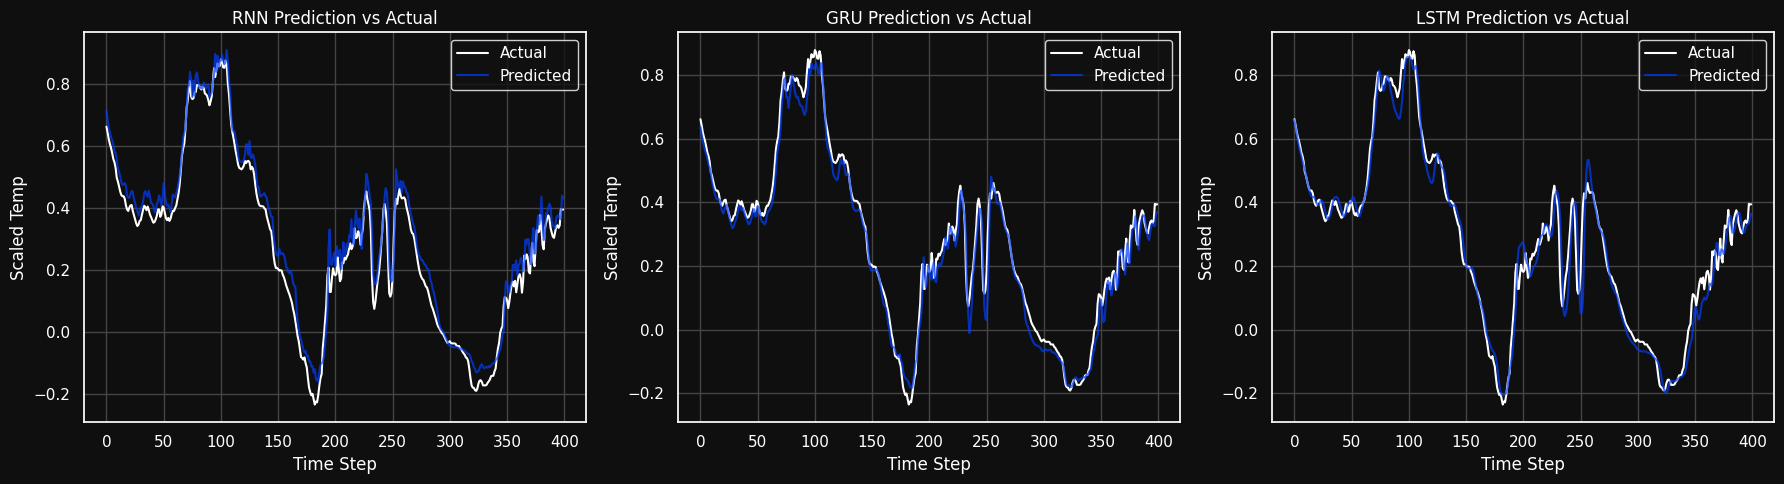

In [22]:
plt.figure(figsize=(18, 5))
for i, name in enumerate(models):
    plt.subplot(1, 3, i + 1)
    plt.plot(y_test[:400], label='Actual', color='white')
    plt.plot(results[name]['y_pred'][:400], label='Predicted', alpha=0.7)
    plt.title(f"{name} Prediction vs Actual", color='white')
    plt.xlabel('Time Step',color='white')
    plt.ylabel('Scaled Temp',color='white')
    plt.legend()
    plt.grid(True)
    plt.xticks(color='white')
    plt.yticks(color='white')
plt.tight_layout()
plt.show()